# Importando bibliotecas

In [310]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
!ln -s drive/My\ Drive/Visao_Computacional_Processamento_de_imagens/Dados /content/Curso

ln: failed to create symbolic link '/content/Curso/Dados': Operation not supported


# 'Hello World' no opencv

In [312]:
img_caminho = 'Curso/Treinamento/positivos/crop_000011.png'
img_teste = cv2.imread(img_caminho)
print(img_teste)

[[[132 177 138]
  [118 164 128]
  [101 152 116]
  ...
  [136 174 148]
  [133 165 143]
  [133 159 141]]

 [[123 164 127]
  [116 160 123]
  [116 162 126]
  ...
  [141 172 146]
  [136 163 139]
  [136 160 140]]

 [[118 156 120]
  [116 159 122]
  [129 176 140]
  ...
  [139 162 139]
  [137 159 137]
  [137 157 139]]

 ...

 [[ 61  63  81]
  [ 69  77  93]
  [ 69  80  94]
  ...
  [ 87 133 127]
  [ 91 137 133]
  [ 86 128 127]]

 [[ 53  61  80]
  [ 68  80  99]
  [ 70  86 104]
  ...
  [107 151 147]
  [115 154 154]
  [106 144 145]]

 [[ 61  81 102]
  [ 64  85 106]
  [ 64  89 107]
  ...
  [116 156 151]
  [127 162 160]
  [130 162 161]]]


## Exibir uma imagem

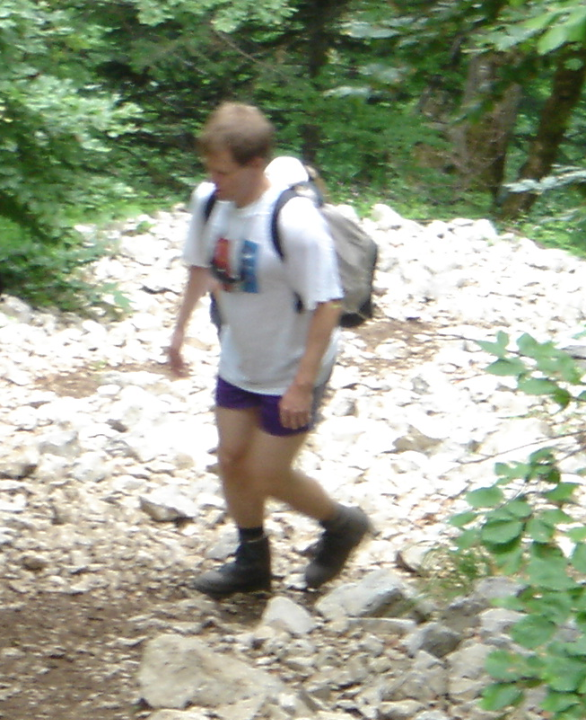

In [313]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_teste)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Tipo e dimensões da imagem

In [314]:
print(type(img_teste))

<class 'numpy.ndarray'>


In [315]:
img_teste.shape

(720, 586, 3)

(altura, largura, canal de cores)

In [316]:
# Menor e maior valor da imagem
print("Minimo: ",np.min(img_teste))
print("Máximo: ",np.max(img_teste))

Minimo:  3
Máximo:  255


## Escalha de cinza da imagem

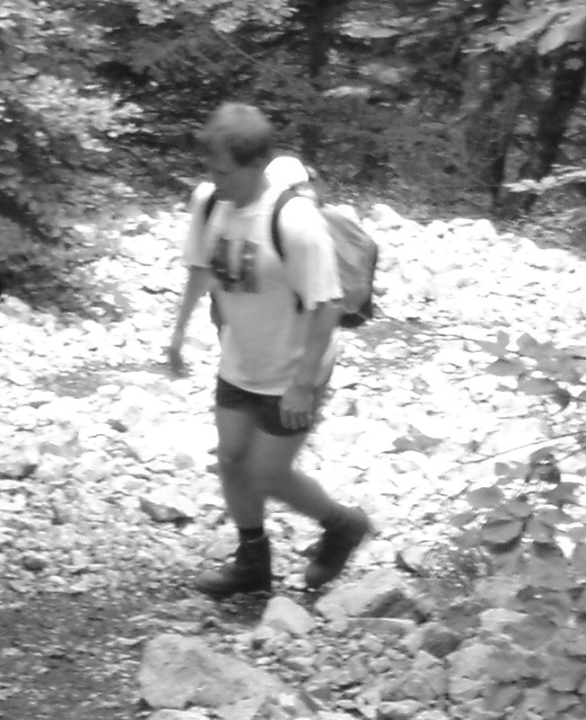

(720, 586)


In [317]:
img_teste_cinza = cv2.cvtColor(img_teste, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_teste_cinza)
cv2.waitKey()
print(img_teste_cinza.shape)

Assim reduz a complexidade da imagem

## Redimensionando as imagens

(720, 586)
(360, 360)


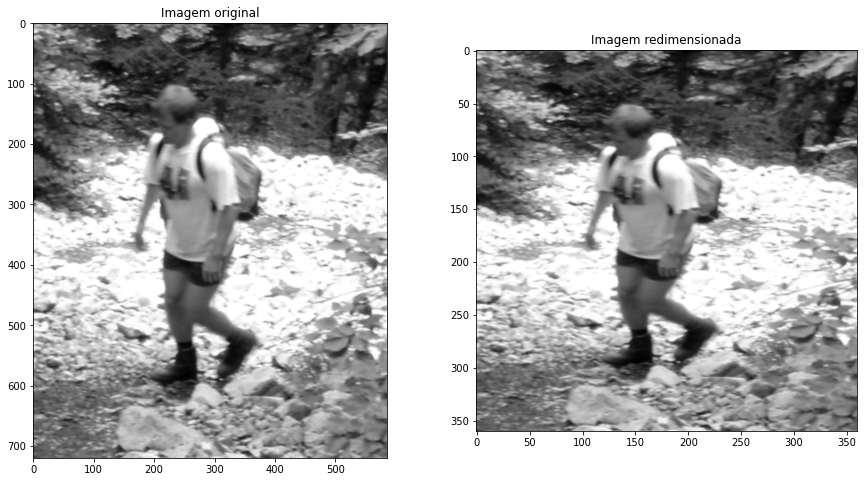

In [318]:
print(img_teste_cinza.shape)
# INTER_CUBIC -> como ele vai tratar os pixels para redimensionar a imagem, vai pela média aritmética dos pixels
img_redimensionada = cv2.resize(img_teste_cinza,(360,360), interpolation = cv2.INTER_CUBIC) 

print(img_redimensionada.shape)
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Imagem original')
plt.imshow(img_teste_cinza,cmap = 'gray',interpolation = 'bicubic')
plt.subplot(122)
plt.title('Imagem redimensionada')
plt.imshow(img_redimensionada,cmap = 'gray',interpolation = 'bicubic')

## Função plotar uma imagem no jupyter

In [319]:
def plot_imagem(image):
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.imshow(image,cmap = 'gray',interpolation = 'bicubic')
    
def plot_comp(image1,image2,title1="Inicial",title2='Final'):
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(121)
    plt.title(title1)
    plt.imshow(image1,cmap = 'gray',interpolation = 'bicubic')
    
    plt.subplot(122)
    plt.title(title2)
    plt.imshow(image2,cmap = 'gray',interpolation = 'bicubic')
    
    plt.show()

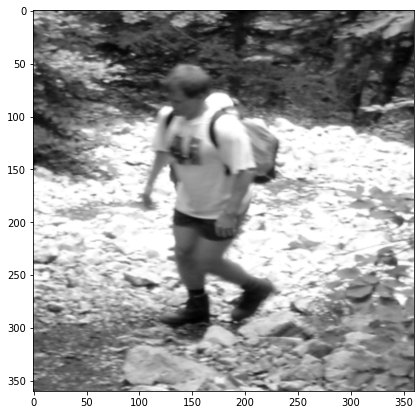

In [320]:
plot_imagem(img_redimensionada)

## Histograma da imagem 

In [321]:
histograma = cv2.calcHist([img_redimensionada],[0],None,[256],[0,256]) # RBB ->[1,1,1], G->[0]

# Tipo da variavel histograma
print(type(histograma))

#Dimensão de uma imagem
print(histograma.shape)

# Colocar os dados como inteiros
#print(histograma.astype(np.int



<class 'numpy.ndarray'>
(256, 1)


## Plotar o histograma da imagem

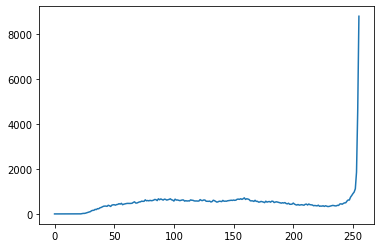

In [322]:
plt.plot(histograma)
plt.show()

## Equalizar a imagem

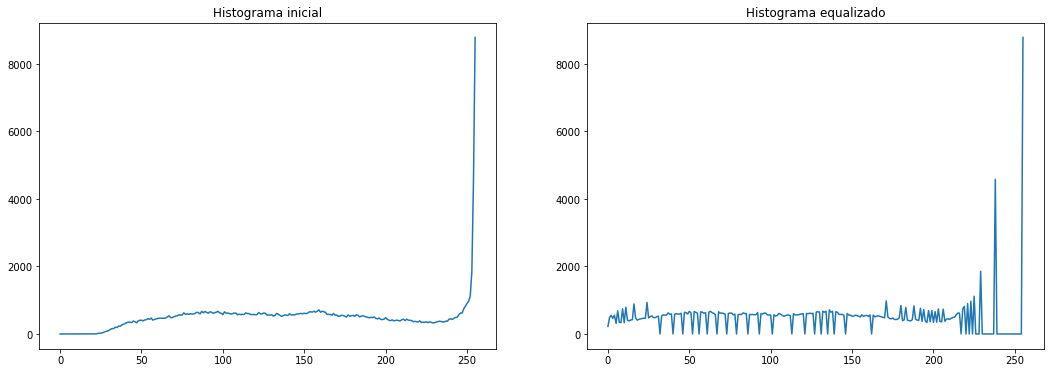

In [323]:
img_teste_equalizada = cv2.equalizeHist(img_redimensionada)
histograma_equalizado = cv2.calcHist([img_teste_equalizada],[0],None,[256],[0,256])

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Histograma inicial')
plt.plot(histograma)
plt.subplot(122)
plt.title('Histograma equalizado')
plt.plot(histograma_equalizado)
plt.show()

## Comparação da imagem equalizada

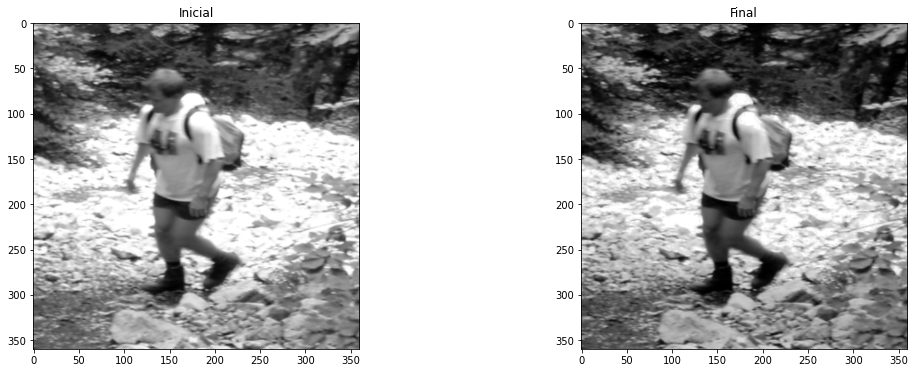

In [324]:
plot_comp(img_redimensionada,img_teste_equalizada)

## Binarizar a imagem para detectar uma uma pessoa

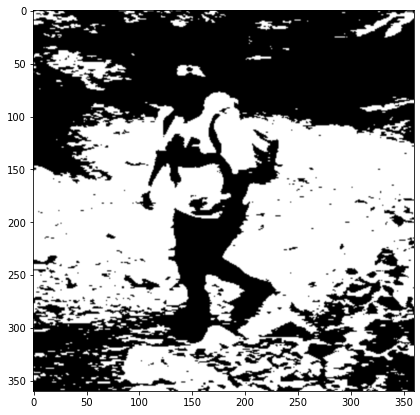

In [325]:
valor_retorno,img_binarizada = cv2.threshold(img_teste_equalizada,
                                             127,255, # MaxValue
                                             cv2.THRESH_BINARY) # 254 tons /2  = 127 de limiar
plot_imagem(img_binarizada)

foi um método simples, daí não se vê muito a pessoa, então vamos usar métodos adpativativos

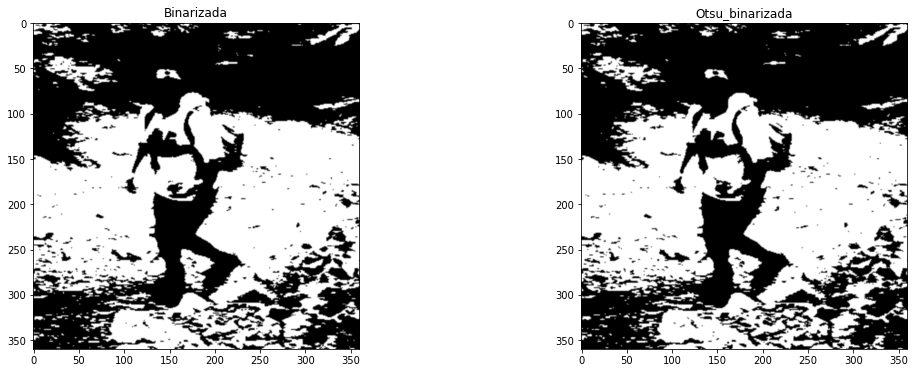

Valor retorno binarizada 127.0 Valor retorno - OTSU: 129.0


In [326]:
# Algoritmo de otsu
valor_retorno_otsu,img_binarizada_otsu = cv2.threshold(img_teste_equalizada,
                                             0,255, # MaxValue
                                             cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 254 tons /2  = 127 de limiar
plot_comp(img_binarizada,img_binarizada_otsu,'Binarizada','Otsu_binarizada')
print('Valor retorno binarizada',valor_retorno,"Valor retorno - OTSU:",valor_retorno_otsu)

Não teve muito resultado pois o algorotimo de otsu trabalha melhor com imagem com seus histograma bimodais(dois picos)

## Suavização da imagem, retirar pixels perdidos


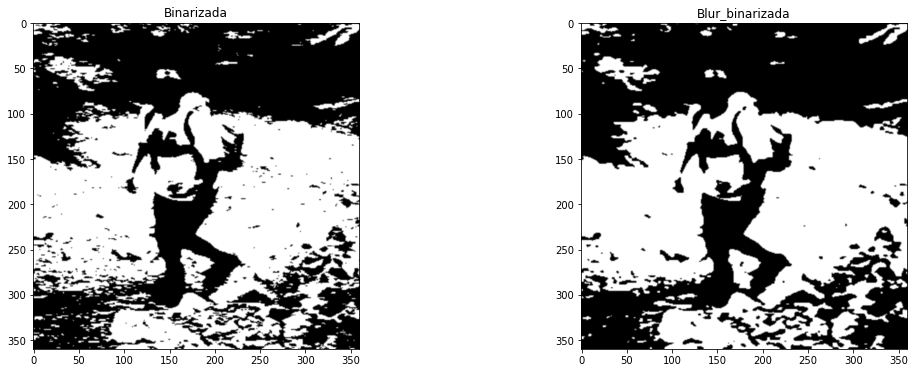

Valor retorno binarizada 127.0 Valor retorno - Blur: 129.0
Vai suavizar a transição das bordas


In [327]:
img_suavizada = cv2.GaussianBlur(img_teste_equalizada,(9,9),1)
valor_retorno_blur,img_binarizada_blur = cv2.threshold(img_suavizada,
                                             0,255, # MaxValue
                                             cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 254 tons /2  = 127 de limiar
plot_comp(img_binarizada,img_binarizada_blur,'Binarizada','Blur_binarizada')
print('Valor retorno binarizada',valor_retorno,"Valor retorno - Blur:",valor_retorno_otsu)
print("Vai suavizar a transição das bordas")

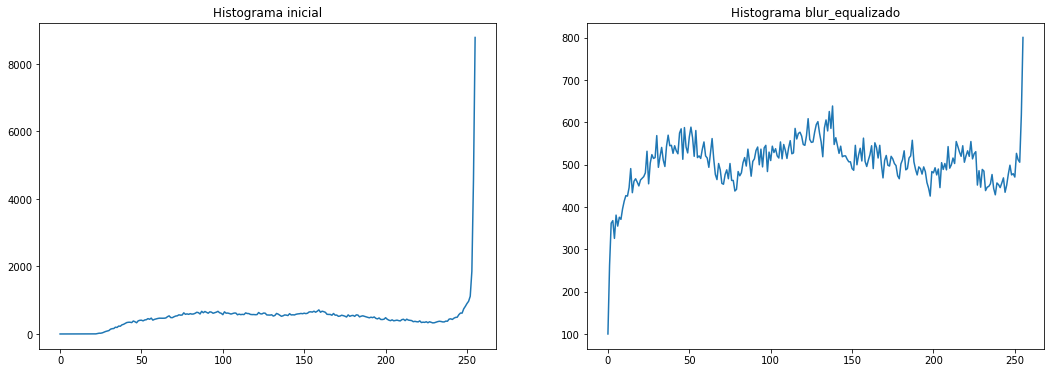

In [328]:
img_teste_equalizada = cv2.equalizeHist(img_redimensionada)
histograma_equalizado = cv2.calcHist([img_suavizada],[0],None,[256],[0,256])

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Histograma inicial')
plt.plot(histograma)
plt.subplot(122)
plt.title('Histograma blur_equalizado')
plt.plot(histograma_equalizado)
plt.show()

## Algortimos de machine learning para segmentar imagens

- altura e largura: Sepala e petala

### Algoritmos de Canny para segmentar a imagem

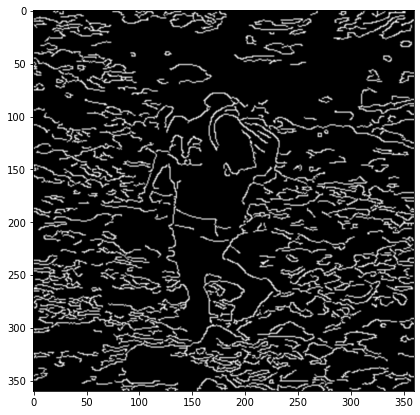

In [329]:
img_canny = cv2.Canny(img_suavizada, 100, 200)
plot_imagem(img_canny)

## Featura Extraction: Detectar pontos chaves na imagem

In [330]:
def get_descritores(img_caminho):
    
    #Ler imagem
    img_test = cv2.imread(img_caminho,0)
    
    #Redimensionar
    img_redimensionada = cv2.resize(img_teste_cinza,(360,360), interpolation = cv2.INTER_CUBIC) 
    
    #Remover ruído
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada,(9,9),1)
    
    #Algoritmo ORB - Oriented FAST and Ratated BRIEF,determinar pontos chaves
    orb= cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    pontos_chave, descritores = orb.compute(img_suavizada, pontos_chave)
    
    return descritores
    

## Algoritmo ORB - Oriented FAST and Ratated BRIEF

### Outros algoritmos para descritores de imagens
### - SURF : Speed up Robust features
### - SIFT : Scale-invariant feature transform

Descritores de uma imagem são essenciais para obtermos informações mais genéricas das imagens e utilizar em algoritmos como de aprendizado de máquina.

In [331]:
descritor = get_descritores(img_caminho)
print('TIPO: ',type(descritor))
print('FORMATO: ',descritor.shape)

TIPO:  <class 'numpy.ndarray'>
FORMATO:  (512, 32)


In [332]:
# img_pontos = cv2.drawKeypoints(img_teste,pontos_chave, outImage=np.array([]), flags = 0)
# plot_imagem(img_pontos)

## Palavras Virtuais

O algoritmo Pacote de Palavras Virtuais é uma adaptação de um algoritmo chamado Pacote de Palavras que foi desenvolvido pela comunidade de processamento de linguagem natural.

In [333]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os

In [376]:
class PacoteDePalavras:
    def gerar_dicionario(self, lista_descritores):
        kmeans = KMeans(n_clusters = 512)
        kmeans = kmeans.fit(lista_descritores)
        self.dicionario = kmeans.cluster_centers_
        
    def histograma_de_frequencia(self, descritor):
        
        try:
            algoritmo_knn = NearestNeighbors(n_neighbors = 5)
            algoritmo_knn.fit(self.dicionario)
            mais_proximos = algoritmo_knn.kneighbors(descritor, return_distance = False).flatten()
            # flatten ->  transformar o array em uma dimensão

            histograma_caracteristicas = np.histogram(mais_proximos,bins=np.arange(self.dicionario.shape[0]+1))[0]

            return histograma_caracteristicas
    
        except AttributeError:
                print('O atributo dicionário não foi definido')
    def salvar_dicionario(self, caminho='', nome_dicionario='dicionario.csv'):
        try: 
            np.savetxt(os.path.join(caminho, nome_dicionario),self.dicionario, delimiter=',', fmt='%f')
            print('Dicionário salvo!!!')
        except AttributeError:
            print("Dicionário vazio")
            
    def carregar_dicionario(self, caminho='', nome_dicionario='dicionario.csv'):
        self.dicionario = np.loadtxt(os.path.join(caminho, nome_dicionario), delimiter='')

In [377]:
teste_palavras_virtuais = PacoteDePalavras()
teste_palavras_virtuais.gerar_dicionario(descritor)
mais_proximos = teste_palavras_virtuais.histograma_de_frequencia(descritor)
print(mais_proximos)

[ 7  4  8  4  4 12  7 11  2  8  7  4  8  6  8  7  9 19 10  3  8  9  9 15
  4  5  5  7  6 10  8  5  7  5  3  5  7  9 11  7  4  3  9  6 10  2  5  7
 11  3 10  8  6  9  5  7  9 14  2  1  6  4  5  6  8  6  9 13  8  3  3  6
 13  4  2  8  3 11  8  8 10  3  3  2 11 11  4  5  4  7  4  6  7  4  6  6
  2 12  4  3  3 12  3  6  7  1  2 10  6  4  4  1  5  6  9  8  2  5  4  1
  4  2  9  6 11  2  6  4  5  4  2  5  3  4  5  2  1  2  2  3  3  2  1  2
  3  3  5  1  3  3  2  3  3  6  2  4  1  7  2  1  1  2  2  2  2  4  7  2
  1  2  4  3  9  2  4  2  6  3  4  2  2  3  5  2  4  3  5  2  1  4  3  2
  4  2  3 16  2  3  3  3  4  1  3  1  2  3  7  2  4  2  2  6  4  1  1  2
  2  3  2  2  2  3  7  2  1  4  2  2  5  2  7  9  2  2  3  2  6  3  5  4
  2  2  2  5  6  3  3  3  2  5  4  3  3  1  4  5  3  3  2  4  1  5  2  2
  2  3  3  6  2  3  4  1  4  6  3  2  2  8  2  5  1  3  2  4  3  4  4  5
  6  3  2  4  3  4  5 12  5  4  3  4  3  6  3  5  7  4  4  6  2  1  7  5
  6  4  5  2  3  3  4  4  8  4  4  2  6  7  1  4  5

In [336]:
dados_treinamento = ['Curso/Treinamento/positivos/','Curso/Treinamento/negativos/']

#Rotina para criação do dicionário de palavras virtuais

descritores = np.empty((0,32), dtype=np.uint8)

for caminho in dados_treinamento:

    for raiz,diretorios,arquivos in os.walk(caminho):
    
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                orb_descritor = get_descritores(os.path.join(caminho,arquivo))
                descritores = np.append(descritores, orb_descritor, axis=0)
                
img_representacao = PacoteDePalavras()
img_representacao.gerar_dicionario(descritores)
img_representacao.salvar_dicionario('Curso/',  'dicionario.csv')

Dicionário salvo!!!


# Computar descritores gerando histograma de cada imagem separadamente

In [387]:
def salvar_descritor(descritor, caminho, nome_arquivo):
    descritor = descritor.reshape((1,descritor.size))
    arquivo = open(os.path.join(caminho, nome_arquivo), 'a')
    np.savetxt(arquivo, descritor, delimiter=',', fmt='%i')
    arquivo.close()

In [ ]:
for caminho in dados_treinamento:
  for raiz, diretorios, arquivos in os.walk(caminho):
    for arquivo in arquivos:
      if arquivo.endswith('.png'):
        descritor = get_descritores(os.path.join(caminho, arquivo))
        histograma_descritor = img_representacao.histograma_de_frequencia(descritor)
        salvar_descritor(histograma_descritor, caminho, 'orb_descritor.csv')
print('Extração de caracterísitca finalizada e descritores salvos!')

In [380]:
!ls Curso/Treinamento/positivos/*.csv

Curso/Treinamento/positivos/orb_descritor.csv


# Classifiação com os descritores salvos


In [385]:
descritores = np.empty((0,512))
def carregar_descritores(caminho, nome_arquivo='orb_descritor.csv'):
    descritores = np.loadtxt(os.path.join(caminho, nome_arquivo), delimiter=',')
    print('formato do array de descritores: ', descritores.shape)
    return descritores

In [386]:
# Carregar descritores
for caminho in dados_treinamento:
    descritores = np.append(descritores, carregar_descritores(caminho, 'orb_descritor.csv'), axis=0)

formato do array de descritores:  (800, 512)
formato do array de descritores:  (800, 512)


## KNN para classificar as imagens


In [383]:
rotulos_treinamento.shape
descritores.shape

(1600, 512)

In [384]:
QUANTIDADE_DE_DADOS_TREINAMENTO = 400
QUANTIDADE_DE_DADOS_TESTE = 100

rotulos_treinamento = np.ones(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8)
rotulos_treinamento = np.append(rotulos_treinamento, np.zeros(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(descritores, rotulos_treinamento)

dados_teste = ['Curso/Teste/positivos/', 'Curso/Teste/negativos/']

img_teste_descritores = np.empty((0, 512), dtype=np.uint8)

for caminho in dados_teste:
    for raiz, diretorios, arquivos in os.walk(caminho):
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                img_descritor = get_descritores(os.path.join(caminho, arquivo))
                img_descritor = img_representacao.histograma_de_frequencia(img_descritor)
                img_dim_expandida = np.expand_dims(img_descritor, axis=0)
                img_teste_descritores = np.append(img_teste_descritores, img_dim_expandida, axis=0)

rotulos_teste = np.ones(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8)
rotulos_teste = np.append(rotulos_teste, np.zeros(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8))

print('Acurácia: ', knn.score(img_teste_descritores, rotulos_teste))

ValueError: ignored



## Matriz de confusão



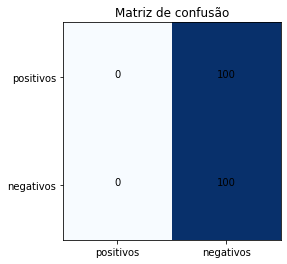

In [359]:
from sklearn.metrics import confusion_matrix

rotulos_previtos = knn.predict(img_teste_descritores)
matriz = confusion_matrix(rotulos_teste, rotulos_previtos)
plt.imshow(matriz, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Matriz de confusão')
labels = ['positivos','negativos']
marcador_escalas = range(len(labels))
plt.yticks(marcador_escalas, labels)
plt.xticks(marcador_escalas, labels)

for linha in range(matriz.shape[0]):
  for coluna in range(matriz.shape[1]):
    plt.text(coluna, linha, format(matriz[linha,coluna]), horizontalalignment='center',color='black')
plt.show()

In [360]:
!pip install yellowbrick

DADOS TREINAMENTO


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


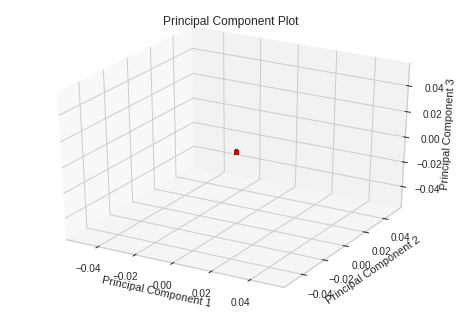

DADOS TESTE


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


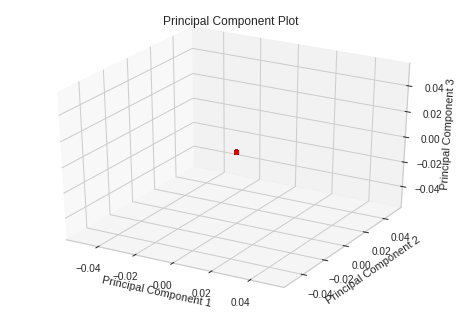

In [375]:
from yellowbrick.features.pca import PCADecomposition

print("DADOS TREINAMENTO")
cores_treinamento = np.array(['r' if label==0 else 'b' for label in rotulos_treinamento])
visualizador_treinamento = PCADecomposition(scale=True, color=cores_treinamento, proj_dim=3)
visualizador_treinamento.fit_transform(descritores, rotulos_treinamento)
visualizador_treinamento.poof()

print('DADOS TESTE')
cores_teste = np.array(['r' if label==0 else 'b' for label in rotulos_teste])
visualizador_teste = PCADecomposition(scale=True, color=cores_teste, proj_dim=3)
visualizador_teste.fit_transform(img_teste_descritores, rotulos_teste)
visualizador_teste.poof()